Jupyter notebook to generate surface plots using hyperct and shgo
===

In [1]:
# Imports
import time
import matplotlib.pyplot as plt
import numpy as np
from shgo._shgo import SHGO
from dipy.reconst.ivim import IvimModel  # REDEFINED LATER
from dipy.data.fetcher import read_ivim
# Plot colour parameters
coldict = {'lo': np.array([242, 189, 138]) / 255,  # Light orange
           'do': np.array([235, 129, 27]) / 255  # Dark alert orange
           }

# Plot colour values example:
Light_color = np.array([242, 189, 138]) / 255
Dark_color = np.array([235, 129, 27]) / 255

roundoff = 3  # The number of decimal places for the "f = _" vals in the surface plots 

### First we import the data and locate the voxels we intend to plot

In [2]:
# Load data
img, gtab = read_ivim()
data = img.get_data()
print('data.shape (%d, %d, %d, %d)' % data.shape)


<ipython-input-2-dd3cc00bf7ab>:3: DeprecationWarning: get_data() is deprecated in favor of get_fdata(), which has a more predictable return type. To obtain get_data() behavior going forward, use numpy.asanyarray(img.dataobj).

* deprecated from version: 3.0
* Will raise <class 'nibabel.deprecator.ExpiredDeprecationError'> as of version: 5.0
  data = img.get_data()


data.shape (256, 256, 54, 21)


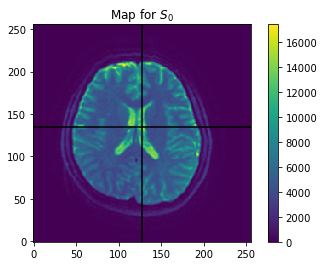

In [3]:
# Define common functions
def plot_map(raw_data, variable, limits, filename):
    fig, ax = plt.subplots(1)
    lower, upper = limits
    ax.set_title('Map for {}'.format(variable))
    im = ax.imshow(raw_data.T, origin='lower', clim=(lower, upper),
                   cmap="viridis", interpolation='nearest')
    fig.colorbar(im)
    fig.savefig(filename)
    
# Locate the voxels used in the plots
z = 33
b = 0

variable = '$S_0$'
fig, ax = plt.subplots(1)
ax.set_title('Map for {}'.format(variable))
im = ax.imshow(data[:, :, z, b].T, origin='lower', cmap='viridis',
           interpolation='nearest')
fig.colorbar(im)
plt.axhline(y=135, color='k')
plt.axvline(x=127, color='k')

In [4]:
# Run for a high f plots
x1, x2 = 127, 128
y1, y2 = 135, 136
data_slice = data[x1:x2, y1:y2, z, :]


### Now we plot the subspace containing D and D* at a constant f, as well as the subspace varying D and f at a constant D*= 1e-7

In [5]:
# Import plots 
from obj_surf import *

/home/stefan_endres/projects/topopro/notebooks/obj_surf.py:213: UserWarning: Bounds for this fit have been set from experiments and literature survey. To change the bounds, please input your bounds in model definition...
  warnings.warn(bounds_warning, UserWarning)


<IPython.core.display.Javascript object>


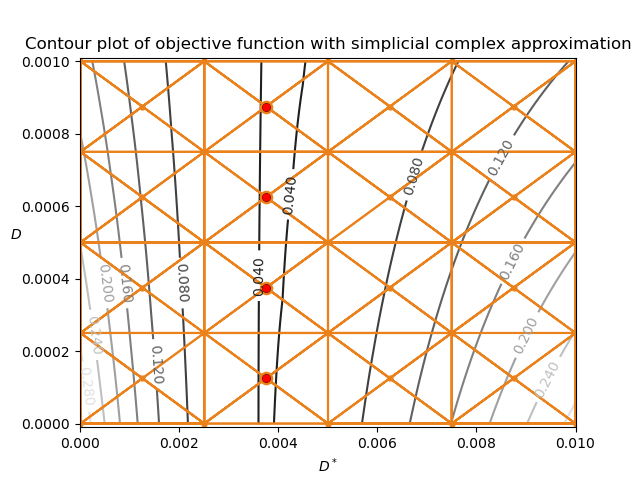

/home/stefan_endres/projects/topopro/notebooks/shgo/_shgo_lib/_complex.py:3114: UserWarning: The following kwargs were not used by contour: 'color'
  cs = pyplot.contour(xg, yg, Z, cmap='binary_r', color='k')


<IPython.core.display.Javascript object>


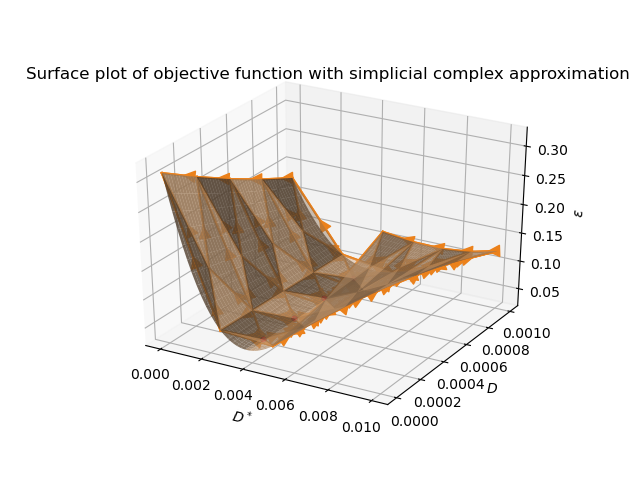

<IPython.core.display.Javascript object>


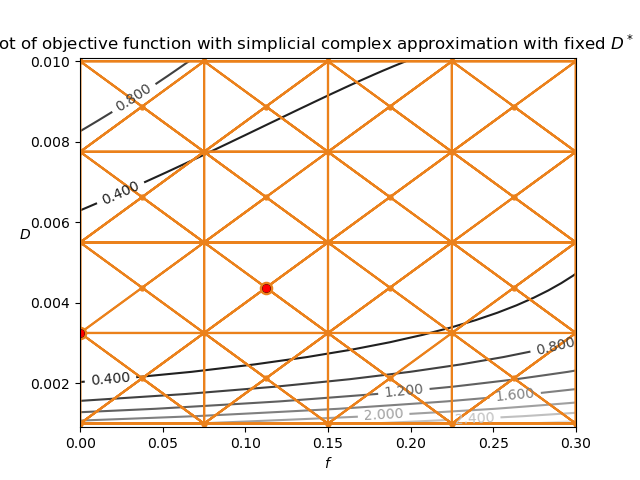

/home/stefan_endres/projects/topopro/notebooks/shgo/_shgo_lib/_complex.py:3114: UserWarning: The following kwargs were not used by contour: 'color'
  cs = pyplot.contour(xg, yg, Z, cmap='binary_r', color='k')


<IPython.core.display.Javascript object>


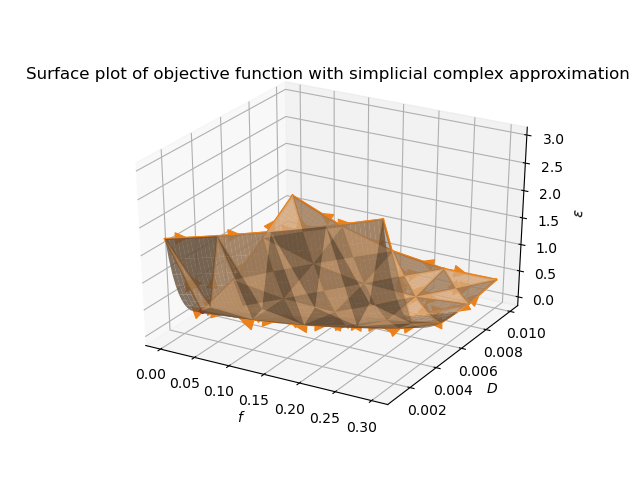

In [6]:
%matplotlib notebook
ts = time.time()
ivimmodel_vp = IvimModel(gtab, fit_method='VarPro')
ts = time.time()
ivimfit_vp = ivimmodel_vp.fit(data_slice)